In [68]:
import os
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt


### Pulling data from the SLC API 

In [35]:
# First Set up the loacation of where to put the data
today = datetime.today().strftime('%Y-%m-%d')            # new data for each date so record the date
os.makedirs(os.path.join("..", "Data", "WL_Data{}".format(today), "UHSLC"), exist_ok=True) # create a new folder for todays date 

# Definte the folder to save files into 
Datapath = os.path.join("..", "Data", "WL_Data{}".format(today), "UHSLC")

# then Grab the station metadata for each of the reservoirs from SLC website
url = 'https://uhslc.soest.hawaii.edu/reservoir/stations.geojson'
meta = pd.json_normalize(requests.get(url).json()['features'])    ## Download the metadata
meta.columns = df.columns.str.replace('geometry.', '', regex=False).str.replace('properties.', '', regex=False)  # clean up column headers 

# Crreate a list of the UH SLC reservoirs to loop over 
UHSLC_ID = meta['id'].tolist() 
UHSLC_ID = [x for x in UHSLC_ID if str(x) != 'nan']  # Filter out nan (Not a Number) values from the list UHSLC_ID.  

# Loop over each reservoir to save each of the files in a date stamped folder
for ID in UHSLC_ID: 
    data = pd.read_csv('https://uhslc.soest.hawaii.edu/reservoir/'  + ID  +  '-full.csv')
    data.to_csv(os.path.join(Datapath, "{}.csv".format(ID)))

C:\Users\CS\AppData\Local\Temp\ipykernel_2232\2194630498.py:19: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://uhslc.soest.hawaii.edu/reservoir/'  + ID  +  '-full.csv')
C:\Users\CS\AppData\Local\Temp\ipykernel_2232\2194630498.py:19: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://uhslc.soest.hawaii.edu/reservoir/'  + ID  +  '-full.csv')


## Pulling data from USGS gauges, 

Brian here is the basic function, can you clean up and maybe wrap this in to what we have already in terns of the known reservoir ID's and the right date ranges? 


Then a key issue, if you 

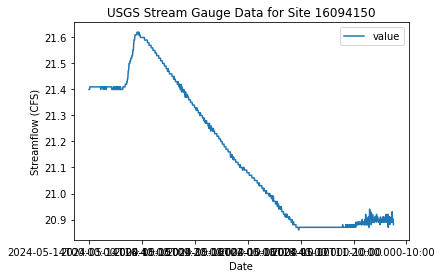

In [72]:
# Define the site and parameters
site = '16094150'
start = "2024-05-14"
end = "2024-05-17"
parameter = "00065"  # Stage/streamflow

# Define the USGS URL for the instantaneous values (IV) service
url = f"https://waterservices.usgs.gov/nwis/iv/?format=json&sites={site}&startDT={start}&endDT={end}&parameterCd={parameter}&siteStatus=all"

# Request the data
response = requests.get(url)
data = response.json()

rows = []

# Loop over all the time series
for time_series in data['value']['timeSeries']:
    # Loop over each value entry within the time series
    for entry in time_series['values'][0]['value']:
        # Extract the needed information and store it in a dictionary
        row = {
            "dateTime": entry["dateTime"],
            "value": float(entry["value"]),
            "qualifiers": entry["qualifiers"]
        }
        # Append the row to the list of rows
        rows.append(row)

# Convert the list of rows into a pandas DataFrame
df = pd.DataFrame(rows)


# Plot the data
df.plot(x='dateTime', y='value')
plt.title(f"USGS Stream Gauge Data for Site {site}")
plt.xlabel("Date")
plt.ylabel("Streamflow (CFS)")
plt.show()
